In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('C:/Users/asus/dev/sales/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:/Users/asus/dev/sales/data\items.csv
C:/Users/asus/dev/sales/data\item_categories.csv
C:/Users/asus/dev/sales/data\sales_train.csv
C:/Users/asus/dev/sales/data\sample_submission.csv
C:/Users/asus/dev/sales/data\shops.csv
C:/Users/asus/dev/sales/data\test.csv


In [3]:
## Load the data into pandas dataframe
sales_train_df = pd.read_csv('C:/Users/asus/dev/sales/data/sales_train.csv')
items_df = pd.read_csv('C:/Users/asus/dev/sales/data/items.csv')
item_cat_df = pd.read_csv('C:/Users/asus/dev/sales/data/item_categories.csv')
shops_df = pd.read_csv('C:/Users/asus/dev/sales/data/shops.csv')
sales_test_df = pd.read_csv('C:/Users/asus/dev/sales/data/test.csv')

In [4]:
## explore the data
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
print(sales_train_df.nunique())
### the data spans 1034 dates, with 60 uniques shops and 21807 unique items.

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64


In [6]:
### lets examine the total sales per month by grouping each sales (by summing the item counts per day)
total_sales_month = sales_train_df.groupby('date_block_num',as_index=False)['item_cnt_day'].sum()
total_sales_month.head()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0


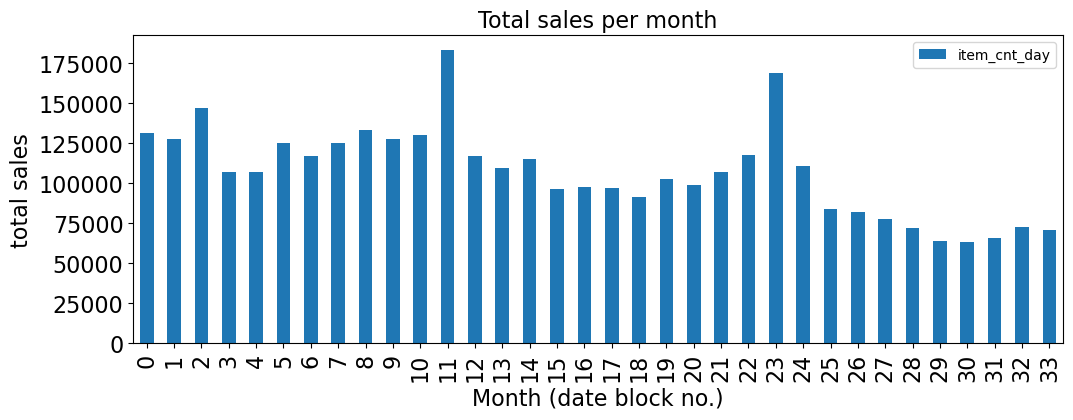

In [7]:
## visualize the total sales to see the pattern per month
import matplotlib.pyplot as plt
total_sales_month.plot.bar(x='date_block_num', y = 'item_cnt_day', figsize=(12,4));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month (date block no.)', fontsize = 16)
plt.ylabel('total sales', fontsize = 16)
plt.title("Total sales per month", fontsize = 16);

In [9]:
## create a sales column to see the total income from sales
sales_train_df['sales_income'] = sales_train_df['item_price'] * sales_train_df['item_cnt_day']
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales_income
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00


In [11]:
### lets examine the total sales per month by grouping each sales (considering the item price)
monthly_sales_price = sales_train_df.groupby(['date_block_num'],as_index=False)['sales_income'].sum()
monthly_sales_price.head()

,date_block_num,sales_income
0,0,9.194709e+07
1,1,9.066571e+07
2,2,1.049327e+08
3,3,6.915429e+07
4,4,6.506531e+07


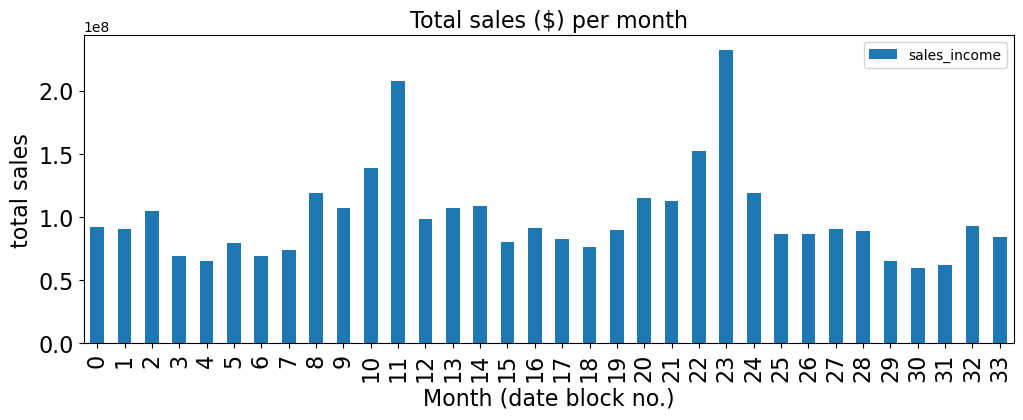

In [12]:
## visualize the total sales to see the pattern per month
import matplotlib.pyplot as plt
monthly_sales_price.plot.bar(x='date_block_num', y = 'sales_income', figsize=(12,4));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month (date block no.)', fontsize = 16)
plt.ylabel('total sales', fontsize = 16)
plt.title("Total sales ($) per month", fontsize = 16);

In [13]:
## print the correlation between to total sales income and number of sales (items) sold
## we see strong correlation but not a correlation of 1 or close to 1. 
print(monthly_sales_price['sales_income'].corr(total_sales_month['item_cnt_day']))


0.7167398499642217


In [14]:
### lets create a dataframe that allow us to visualize the sales made by each shop
sales_per_shop = sales_train_df.groupby(['shop_id', 'date_block_num'], as_index=False)['item_cnt_day'].sum()
sales_per_shop.head(10)

,shop_id,date_block_num,item_cnt_day
0,0,0,5578.0
1,0,1,6127.0
2,1,0,2947.0
3,1,1,3364.0
4,2,0,1146.0
5,2,1,488.0
6,2,2,753.0
7,2,3,583.0
8,2,4,553.0
9,2,5,832.0


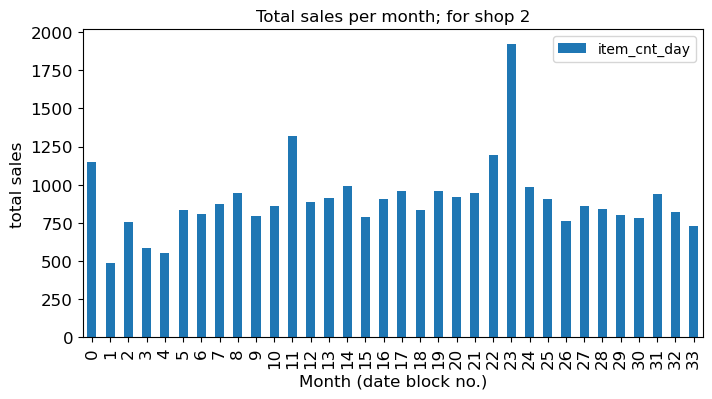

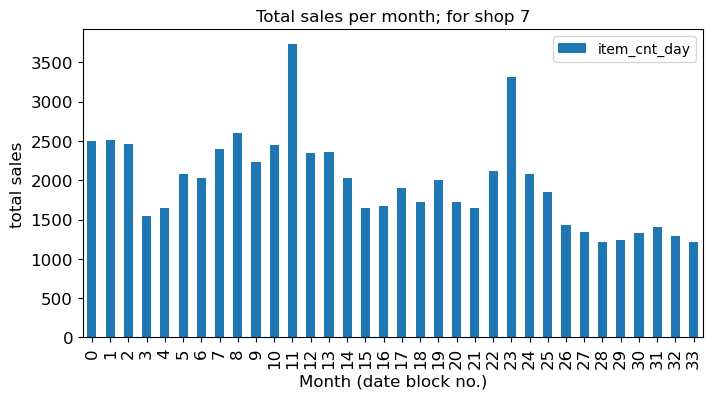

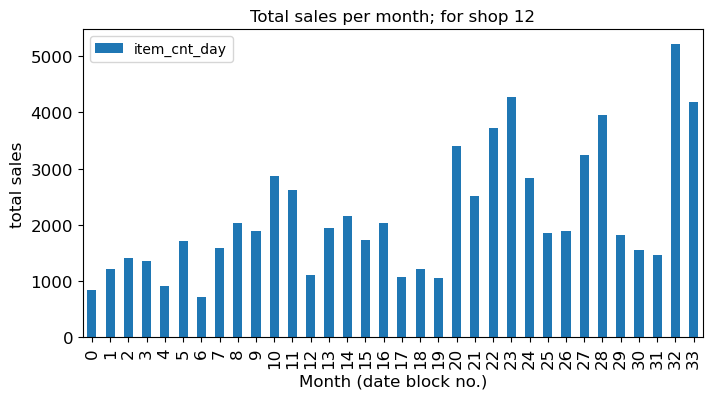

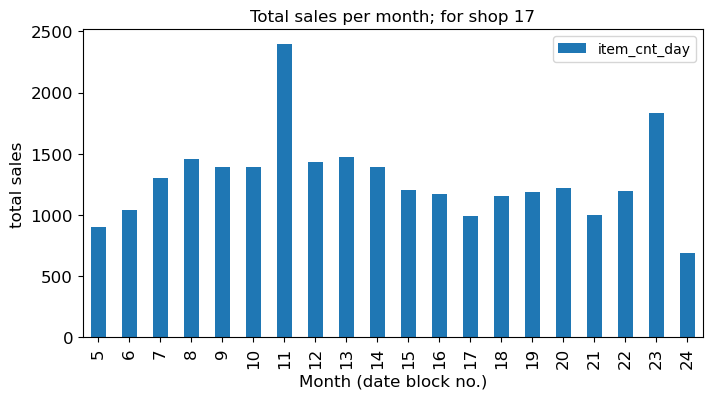

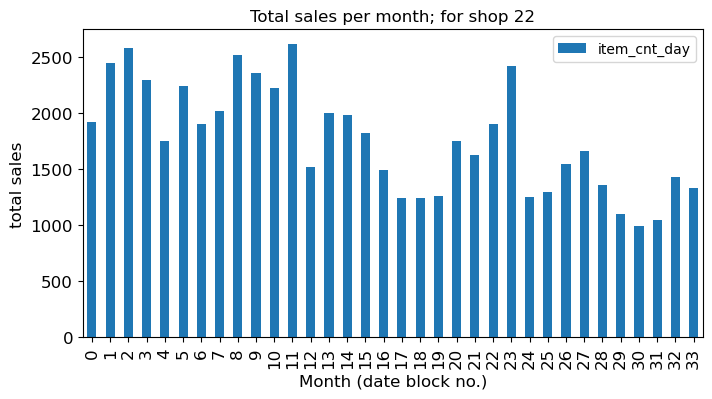

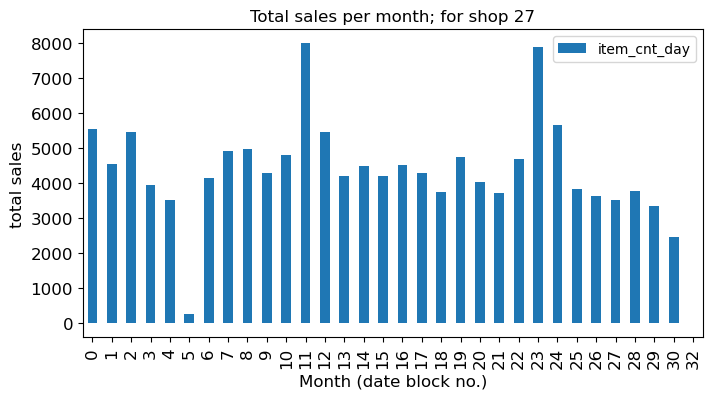

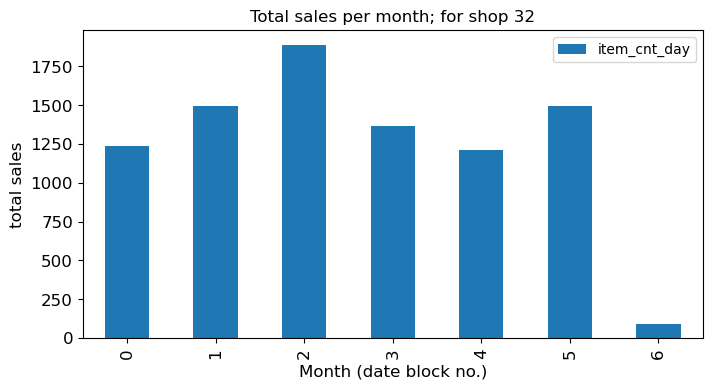

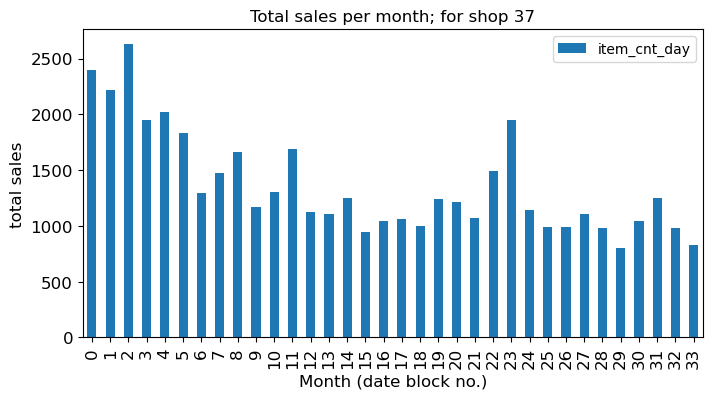

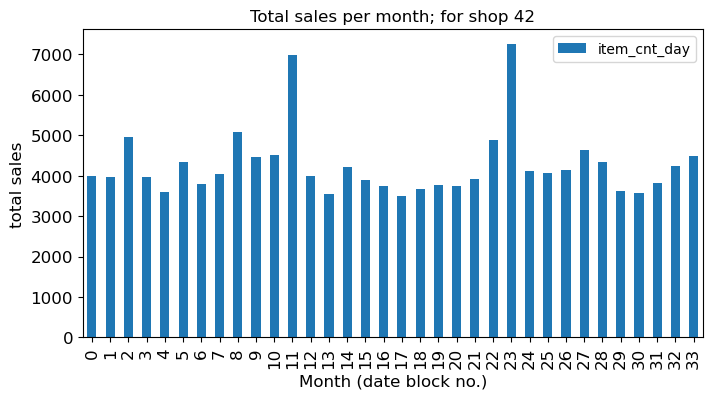

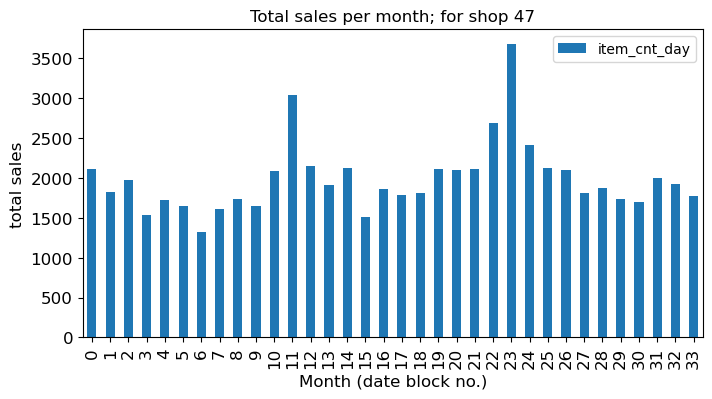

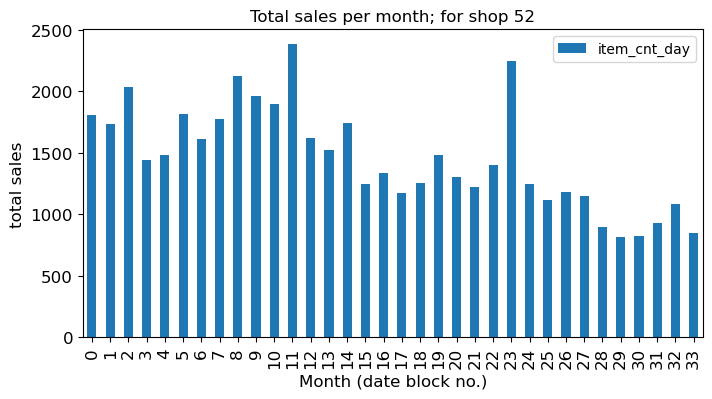

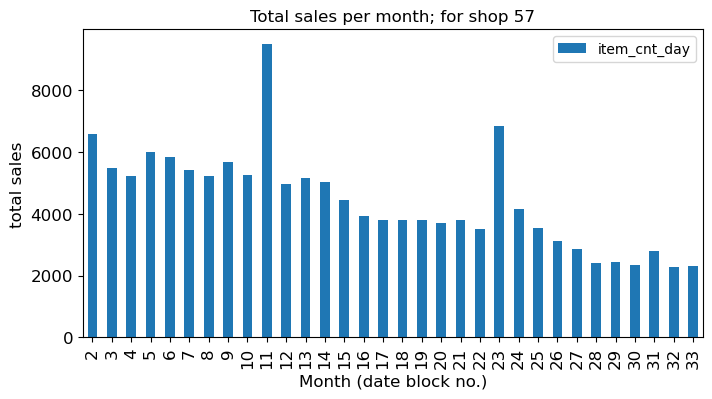

In [15]:
for i in range(2, 60, 5):
    import matplotlib.pyplot as plt
    df = sales_per_shop[sales_per_shop["shop_id"] == i]
    df.plot.bar(x='date_block_num', y = 'item_cnt_day', figsize=(8,4));
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Month (date block no.)', fontsize = 12)
    plt.ylabel('total sales', fontsize = 12)
    plt.title("Total sales per month; for shop %i" %i, fontsize = 12);

In [16]:
## exploring other columns
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [20]:
item_cat_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [21]:
## prediction
X_train = sales_train_df.merge(sales_per_shop , on=['date_block_num','shop_id'])
X_train.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day_x,sales_income,item_cnt_day_y
2662896,12.05.2015,28,42,4873,1199.0,1.0,1199.0,4343.0
2797513,25.08.2015,31,55,10208,1199.0,1.0,1199.0,1976.0
2111423,13.11.2014,22,31,6121,299.5,1.0,299.5,9865.0
1776900,21.06.2014,17,35,1830,599.0,1.0,599.0,1963.0
1414837,21.02.2014,13,21,17568,399.0,1.0,399.0,1822.0
875571,12.09.2013,8,25,10292,99.0,1.0,99.0,9251.0
2580622,21.04.2015,27,57,17467,349.0,1.0,349.0,2860.0
1328869,09.01.2014,12,41,19216,149.0,1.0,149.0,2055.0
2561321,22.04.2015,27,31,18513,249.0,2.0,498.0,7341.0
1979323,08.09.2014,20,51,20949,3.0,1.0,3.0,1106.0


In [22]:
## rename columns
X_train.rename(columns = {'item_cnt_day_x' : 'item_cnt_day','item_cnt_day_y':'item_cnt_month'},inplace=True)
X_train.drop(labels=['date'], inplace=True, axis=1)
X_train.sample(5)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales_income,item_cnt_month
2698759,29,26,12206,2499.0,1.0,2499.0,953.0
542917,5,31,14617,199.0,2.0,398.0,10072.0
596098,5,26,16787,2599.0,3.0,7797.0,2661.0
974624,9,28,14019,349.0,1.0,349.0,5609.0
742985,7,54,16849,399.0,1.0,399.0,7792.0


In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
X_training = X_train[['shop_id' , 'item_id']]
Y = X_train['item_cnt_month']

In [25]:
### splitting data
X_train, X_valid, y_train, y_valid = train_test_split(X_training , Y, random_state = 10)

In [36]:

## Grid search CV for best parameters
no_features = X_train.shape[1] - 1
no_samples = X_train.shape[0]
grid = GridSearchCV(RandomForestRegressor(random_state=1), cv=2, n_jobs=-1, verbose=5,
                    param_grid ={
                    'n_estimators':[10, 50],
                    'max_depth': [5,10,15],
                    'max_leaf_nodes': [5,20],
                    'max_features': ['sqrt', 'auto'],
                    'min_samples_split': [2],
                    'min_samples_leaf':[1]},
                    )
 
grid.fit(X_train, y_train)
print('Best parameters for the RF : ',grid.best_params_)
print('Training r2 score : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test r2 score : %.3f'%grid.best_estimator_.score(X_valid,y_valid))
print('Best r2 score during r2 score : %.3f'%grid.best_score_)



Fitting 2 folds for each of 24 candidates, totalling 48 fits


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\asus\anaconda3\Lib\site-packages\sklear

Best parameters for the RF :  {'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Training r2 score : 0.594
Test r2 score : 0.594
Best r2 score during r2 score : 0.593


In [37]:
## Using RF regression to predict sales
rf_model = RandomForestRegressor(n_estimators= 50, max_depth=10,
                                 max_leaf_nodes = 20, min_samples_leaf = 1, min_samples_split = 2, criterion='squared_error').fit(X_train , y_train)
y_pred = rf_model.predict(X_valid)
print('MSE = {0:.2f}'.format(mean_squared_error(y_valid , y_pred)))

MSE = 1568906.82


In [34]:
sales_test_df.head()

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [43]:
ID = sales_test_df['item_id']
sales_test_df.drop(labels=['item_id'], axis=1, inplace=True)

sales_predictions = rf_model.predict(sales_test_df)
output = pd.DataFrame(data={'item_cnt_month':sales_predictions},
                      index= ID)

KeyError: 'ID'

In [39]:
output.to_csv('submission.csv')